# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

# Paso 1. Lleva a cabo el análisis exploratorio de datos
#### - Abrir el archivo de datos y leer la información general
#### - Preparar los datos para el análisis
- *Cambia el nombre de las columnas de manera que sea conveniente para ti*
- *Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario*

# Paso 2. Identificar operadores ineficaces
#### - Estudiar y comprobar los datos
- Identificar operadores con un alto porcentaje de llamadas perdidas (Lost Call Rate - LCR):

- Analizar el tiempo de espera promedio para las llamadas entrantes por operador (Average Call Duration - ACD):

  - Identificar aquellos que superen un umbral definido (por ejemplo, el percentil 75 del tiempo promedio).

- Tasa de Llamadas Internas (Internal Call Rate - ICR)
  

- Eficiencia de Llamadas Salientes (Outbound Call Efficiency - OCE)

- Porcentaje de Llamadas Exitosas (Call Success Rate - CSR)

#### - Generar métricas clave para clasificar ineficiencia KPIs
   - Analisar y medir el desempeno por porcentaje de los trabajadores


# Paso 3. Medir la eficiencia de los operadores
  - Analisar y medir el desempeno por porcentaje de los trabajadores
      



## Paso 1. Lleva a cabo el análisis exploratorio de datos
#### - Abrir el archivo de datos y leer la información general
#### - Preparar los datos para el análisis
- *Cambia el nombre de las columnas de manera que sea conveniente para ti*
- *Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
clients = pd.read_csv('/content/telecom_clients_us.csv')
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [ ]:
dataset = pd.read_csv('/content/telecom_dataset_us.csv')
dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [ ]:
# Cambio de tipo de dato  correspondiente
clients['user_id'] = clients['user_id'].astype(int)  # Confirmar que son enteros
clients['tariff_plan'] = clients['tariff_plan'].astype(str)  # Confirmar que son cadenas
clients['date_start'] = pd.to_datetime(clients['date_start'], errors='coerce')  # Convertir a formato fecha
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [ ]:
# Verificar valores nulos después de la conversión
display(clients.isnull().sum())

,0
user_id,0
tariff_plan,0
date_start,0


In [ ]:
# Verificar filas duplicadas en todo el DataFrame
duplicated_rows = clients[clients.duplicated()]
print(f"Número de filas duplicadas: {len(duplicated_rows)}")


# Verificar duplicados en una columna específica (por ejemplo, 'user_id')
duplicated_user_ids = clients[clients['user_id'].duplicated()]
print(f"Número de IDs de usuario duplicados: {len(duplicated_user_ids)}")



Número de filas duplicadas: 0
Número de IDs de usuario duplicados: 0


## **Limpieza de Datos en el df clients**
*Durante el proceso de preparación de los datos, se verificó la calidad del conjunto proporcionado. En primer lugar, se confirmó que no existen valores nulos ni duplicados en el DataFrame, lo que garantiza la integridad de la información. Además, se ajustaron los tipos de datos en las columnas clave:*

- La columna user_id fue convertida a un formato de tipo entero para facilitar su manipulación.
- La columna tariff_plan se aseguró como tipo texto, reflejando su naturaleza categórica.
- La columna date_start fue transformada a un formato de fecha (datetime) para permitir un análisis temporal más preciso.

## *dataset*

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [ ]:
# Ajustar tipos de datos
dataset['user_id'] = dataset['user_id'].astype(int)  # Confirmar como entero
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')  # Convertir a formato de fecha
dataset['direction'] = dataset['direction'].astype(str)  # Asegurar como texto
dataset['internal'] = dataset['internal'].astype('boolean')  # Convertir a tipo booleano (maneja nulos)
dataset['operator_id'] = dataset['operator_id'].fillna(-1).astype(int)  # Manejar nulos y convertir a entero
dataset['is_missed_call'] = dataset['is_missed_call'].astype(bool)  # Asegurar como booleano
dataset['calls_count'] = dataset['calls_count'].astype(int)  # Confirmar como entero
dataset['call_duration'] = dataset['call_duration'].astype(int)  # Confirmar como entero
dataset['total_call_duration'] = dataset['total_call_duration'].astype(int)  # Confirmar como entero

# Verificar los cambios
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  boolean                  
 4   operator_id          53902 non-null  int64                    
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), boolean(1), datetime64[ns, UTC+03:00](1), int64(5), object(1)
memory usage: 3.0+ MB


None

Se ajustaron los tipos de datos del DataFrame para optimizar su uso y garantizar coherencia:

- date pasó de object a datetime64[ns, UTC+03:00] para permitir análisis temporales.
- internal se convirtió de object a boolean, mejorando claridad y memoria.
operator_id cambió de float64 a int64, corrigiendo su representación como identificador.

El resto de las columnas mantuvo sus tipos adecuados. Estos cambios mejoraron la eficiencia y precisión del análisis.

In [ ]:
# Realizar el merge entre dataset y clients usando 'user_id' como clave
merged_df = dataset.merge(clients, on='user_id', how='inner')

# Mostrar las primeras filas del DataFrame combinado
merged_df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,-1,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,B,2019-08-01


# Paso 2. Identificar operadores ineficaces
#### - Estudiar y comprobar los datos
- Identificar operadores con un alto porcentaje de llamadas perdidas (Lost Call Rate - LCR):

- Analizar el tiempo de espera promedio para las llamadas entrantes por operador (Average Call Duration - ACD):

  - Identificar aquellos que superen un umbral definido (por ejemplo, el percentil 75 del tiempo promedio).

- Tasa de Llamadas Internas (Internal Call Rate - ICR)
  

- Eficiencia de Llamadas Salientes (Outbound Call Efficiency - OCE)

- Porcentaje de Llamadas Exitosas (Call Success Rate - CSR)

### *Identificar operadores con un alto porcentaje de llamadas perdidas (Lost Call Rate - LCR):*

  - *Filtrar las llamadas entrantes y contar el número de llamadas perdidas por operador.*

In [ ]:
# Filtrar las llamadas entrantes
incoming_calls = dataset[dataset['direction'] == 'in']

# Filtrar las llamadas perdidas dentro de las entrantes
missed_incoming_calls = incoming_calls[incoming_calls['is_missed_call'] == True]

# Contar el número de llamadas perdidas por operador
missed_calls_by_operator = missed_incoming_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Contar el número total de llamadas entrantes por operador
total_calls_by_operator = incoming_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Combinar los datos para incluir todos los operadores (merge tipo outer)
lost_call_rate = pd.merge(
    missed_calls_by_operator,
    total_calls_by_operator,
    on='operator_id',
    how='outer',
    suffixes=('_missed', '_total')
)

# Rellenar valores faltantes con 0 para operadores sin llamadas perdidas
lost_call_rate['calls_count_missed'] = lost_call_rate['calls_count_missed'].fillna(0)
lost_call_rate['calls_count_total'] = lost_call_rate['calls_count_total'].fillna(0)

# Calcular el porcentaje de llamadas perdidas
lost_call_rate['lost_call_rate'] = (lost_call_rate['calls_count_missed'] / lost_call_rate['calls_count_total'].replace(0, 1)) * 100

# Renombrar columnas para mayor claridad
lost_call_rate = lost_call_rate.rename(columns={
    'calls_count_missed': 'missed_calls_count',
    'calls_count_total': 'total_calls_count'
})

# Ordenar por porcentaje de llamadas perdidas en orden descendente
lost_call_rate_sorted = lost_call_rate.sort_values(by='lost_call_rate', ascending=False)

# Mostrar el DataFrame ajustado
lost_call_rate_sorted.head(10)


,operator_id,missed_calls_count,total_calls_count,lost_call_rate
642,948756,1.0,1,100.000000
0,-1,112453.0,113167,99.369074
186,904344,6.0,7,85.714286
288,913886,1.0,2,50.000000
211,906392,7.0,19,36.842105
...,...,...,...,...
356,921102,0.0,13,0.000000
355,921062,0.0,120,0.000000
354,920982,0.0,61,0.000000
353,920930,0.0,1,0.000000


## *Duración Promedio de Llamadas (Average Call Duration - ACD):*

Calcular el tiempo promedio de espera para cada operador.

Identificar aquellos que superen un umbral definido (por ejemplo, el percentil 95 del tiempo promedio).

In [ ]:
# Filtrar las llamadas entrantes
incoming_calls = dataset[dataset['direction'] == 'in'].copy()  # Usar .copy() para evitar el warning

# Calcular el tiempo de espera
incoming_calls['waiting_time'] = incoming_calls['total_call_duration'] - incoming_calls['call_duration']

# Contar operadores únicos
unique_operators = incoming_calls['operator_id'].nunique()
print(f"Operadores únicos: {unique_operators}")

# Calcular el tiempo promedio de espera por operador
average_waiting_time = incoming_calls.groupby('operator_id')['waiting_time'].mean().reset_index()

# Renombrar columnas para mayor claridad
average_waiting_time = average_waiting_time.rename(columns={'waiting_time': 'average_waiting_time'})

# Ordenar por porcentaje de llamadas perdidas en orden descendente
average_waiting_time = average_waiting_time.sort_values(by='average_waiting_time', ascending=False)

# Mostrar el resultado
average_waiting_time.head(10)

Operadores únicos: 755


,operator_id,average_waiting_time
338,919794,1039.540541
207,906070,853.312500
336,919790,839.802817
446,931458,655.236364
208,906076,611.500000
359,921318,607.466667
329,919204,579.277778
334,919552,556.776316
289,913938,535.047619
335,919554,518.154762


In [ ]:
# Calcular el tiempo de espera
dataset['waiting_time'] = dataset['total_call_duration'] - dataset['call_duration']

# Calcular el tiempo promedio de espera por operador
average_waiting_time = dataset.groupby('operator_id')['waiting_time'].mean().reset_index()

# Calcular el percentil 95 del tiempo promedio de espera
threshold_95 = average_waiting_time['waiting_time'].quantile(0.95)

# Identificar si cada operador supera el umbral del percentil 95
average_waiting_time['above_threshold'] = average_waiting_time['waiting_time'] > threshold_95

# Ordenar el tiempo promedio de espera en orden ascendente
average_waiting_time_sorted = average_waiting_time.sort_values(by='waiting_time', ascending=False)

# Mostrar resultados
print("Percentil 95 del tiempo promedio de espera:", threshold_95)
print(f"Operadores que superan el umbral del percentil 95: {len(average_waiting_time_sorted[average_waiting_time_sorted['above_threshold']])}")
average_waiting_time_sorted.head(10)

Percentil 95 del tiempo promedio de espera: 1126.974270270269
Operadores que superan el umbral del percentil 95: 55


,operator_id,waiting_time,above_threshold
552,925922,5907.443038,True
30,885890,5727.133574,True
584,929428,5325.342857,True
29,885876,4816.241379,True
318,908640,3456.461538,True
583,929426,3316.558824,True
844,945278,2858.479167,True
449,919364,2841.465116,True
848,945286,2185.774648,True
871,945904,2128.657895,True


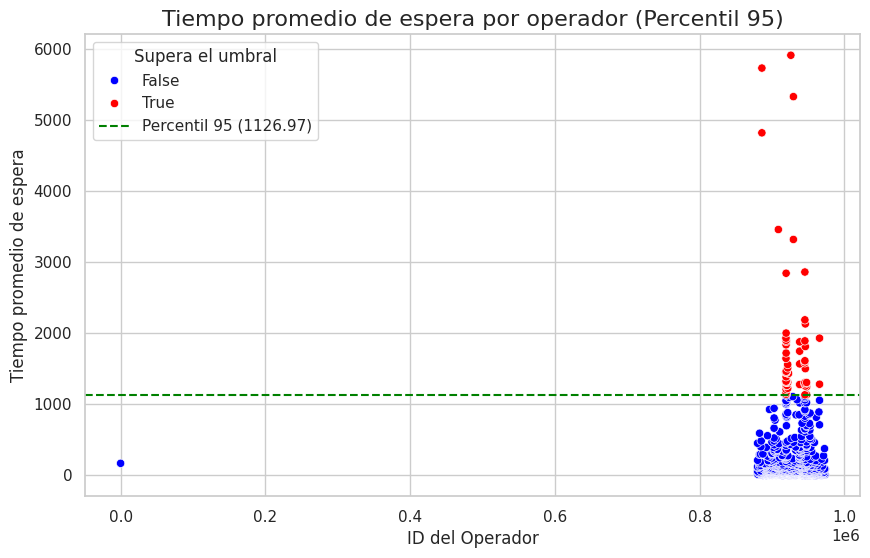

In [ ]:

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=average_waiting_time_sorted,
    x='operator_id',
    y='waiting_time',
    hue='above_threshold',  # Colorear según si superan el umbral
    palette={True: 'red', False: 'blue'},
    legend="full"
)

# Agregar una línea de referencia para el percentil 95
plt.axhline(y=threshold_95, color='green', linestyle='--', label=f'Percentil 95 ({threshold_95:.2f})')

# Etiquetas y título
plt.title('Tiempo promedio de espera por operador (Percentil 95)', fontsize=16)
plt.xlabel('ID del Operador', fontsize=12)
plt.ylabel('Tiempo promedio de espera', fontsize=12)
plt.legend(title='Supera el umbral')

# Mostrar el gráfico
plt.show()

### *Este gráfico muestra el tiempo promedio de espera por operador, con un umbral definido por el percentil 95 (1126.97 segundos). Los puntos en rojo representan operadores cuyo tiempo promedio de espera supera este umbral, mientras que los puntos en azul indican operadores que están por debajo.*

simplycontact.com/how-to-measure-call-center-performance-post/

pmc.ncbi.nlm.nih.gov/articles/PMC2645141/

www.customercontactcentral.com/average-handle-time/wait-times/

simplycontact.com/average-hold-time-for-contact-centers/

www.staceybarr.com/measure-up/
how-to-meaningfully-measure-queue-performance-and-waiting-times/

## *Tasa de Llamadas Internas (Internal Call Rate - ICR):*

In [ ]:
# Filtrar las llamadas internas y totales por operador
icr_data = dataset.groupby('operator_id').agg(
    internal_calls=('calls_count', lambda x: x[dataset.loc[x.index, 'internal']].sum()),
    total_calls=('calls_count', 'sum')
)

# Calcular la ICR
icr_data['ICR'] = (icr_data['internal_calls'] / icr_data['total_calls']) * 100

# Ver los resultados ordenados por ICR
icr_data.sort_values(by='ICR', ascending=False)


,internal_calls,total_calls,ICR
operator_id,,,
923646,2,2,100.0
969284,1,1,100.0
967204,3,3,100.0
966686,3,3,100.0
940772,2,2,100.0
...,...,...,...
914348,0,9,0.0
914426,0,7,0.0
914626,0,1,0.0


### *Eficiencia de Llamadas Salientes (Outbound Call Efficiency - OCE)*

In [ ]:
# Filtrar las llamadas salientes
outbound_calls = dataset[dataset['direction'] == 'out']

# Calcular las llamadas salientes exitosas por operador
outbound_calls_success = outbound_calls[outbound_calls['is_missed_call'] == 0].groupby('operator_id')['calls_count'].sum()

# Calcular el total de llamadas salientes por operador
outbound_calls_total = outbound_calls.groupby('operator_id')['calls_count'].sum()

# Calcular la Eficiencia de Llamadas Salientes (OCE)
outbound_call_efficiency = (outbound_calls_success / outbound_calls_total) * 100

# Crear un DataFrame para visualizar los resultados
oce_df = outbound_call_efficiency.reset_index(name='OCE (%)').sort_values(by='OCE (%)', ascending=False)

oce_df

,operator_id,OCE (%)
525,935956,100.0
292,914256,100.0
598,939236,100.0
842,963716,100.0
273,910902,100.0
...,...,...
864,969288,NaN
866,969380,NaN
869,970240,NaN
872,970250,NaN


### *Porcentaje de Llamadas Exitosas (Call Success Rate - CSR)*

In [ ]:
# Calcular el total de llamadas por operador
total_calls = dataset.groupby('operator_id')['calls_count'].sum()

# Calcular el total de llamadas exitosas (no perdidas) por operador
successful_calls = dataset[dataset['is_missed_call'] == 0].groupby('operator_id')['calls_count'].sum()

# Calcular el Porcentaje de Llamadas Exitosas (CSR)
call_success_rate = (successful_calls / total_calls) * 100

# Crear un DataFrame para visualizar los resultados
csr_df = call_success_rate.reset_index(name='CSR (%)').sort_values(by='CSR (%)', ascending=False)

csr_df

,operator_id,CSR (%)
1092,973286,100.0
335,910018,100.0
580,929332,100.0
826,944246,100.0
581,929340,100.0
...,...,...
1042,962904,NaN
1065,969262,NaN
1068,969284,NaN
1078,970250,NaN


#### *Generar métricas clave para clasificar ineficiencia KPIs*
   - Analisar y medir el desempeno por porcentaje de los trabajadores

In [ ]:
# Asegurarse de que 'operator_id' esté como columna y no como índice
icr_data = icr_data.reset_index()

# Extraer columnas relevantes de cada DataFrame
lost_call_rate = lost_call_rate_sorted[['operator_id', 'lost_call_rate']]
average_waiting_time = average_waiting_time[['operator_id', 'average_waiting_time']]
icr_data = icr_data[['operator_id', 'ICR']]
oce_df = oce_df[['operator_id', 'OCE (%)']]
csr_df = csr_df[['operator_id', 'CSR (%)']]

# Merge secuencial para crear 'kpis'
kpis = lost_call_rate.merge(average_waiting_time, on='operator_id', how='inner') \
    .merge(icr_data, on='operator_id', how='inner') \
    .merge(oce_df, on='operator_id', how='inner') \
    .merge(csr_df, on='operator_id', how='inner')

kpis

,operator_id,lost_call_rate,average_waiting_time,ICR,OCE (%),CSR (%)
0,948756,100.000000,8.000000,10.227273,70.285714,69.886364
1,-1,99.369074,171.238585,0.940941,60.837887,0.921594
2,904344,85.714286,31.000000,41.666667,NaN,8.333333
3,906392,36.842105,31.875000,71.250000,14.754098,26.250000
4,957922,33.333333,13.000000,52.173913,85.000000,82.608696
...,...,...,...,...,...,...
540,922114,0.000000,61.000000,46.153846,91.666667,92.307692
541,892538,0.000000,52.428571,0.000000,71.544715,74.074074
542,921104,0.000000,30.750000,40.000000,33.333333,60.000000
543,921102,0.000000,29.333333,36.666667,35.294118,63.333333


In [ ]:
# Definir pesos (ajústalos según prioridad)
w1, w2, w3, w4, w5 = 0.2, 0.2, 0.2, 0.2, 0.2

# Normalizar valores
kpis['LCR_norm'] = kpis['lost_call_rate'] / 100
kpis['AWT_norm'] = kpis['average_waiting_time'] / kpis['average_waiting_time'].max()
kpis['ICR_norm'] = kpis['ICR'] / kpis['ICR'].max()
kpis['OCE_norm'] = kpis['OCE (%)'] / 100
kpis['CSR_norm'] = kpis['CSR (%)'] / 100

# Calcular calificación
kpis['calification'] = (w1 * (1 - kpis['LCR_norm']) +  # Menor tasa de llamadas perdidas es mejor
                        w2 * (1 - kpis['AWT_norm']) +  # Menor tiempo de espera es mejor
                        w3 * kpis['ICR_norm'] +        # Mayor tasa de llamadas internas es mejor
                        w4 * kpis['OCE_norm'] +        # Mayor eficiencia de llamadas salientes es mejor
                        w5 * kpis['CSR_norm'])         # Mayor porcentaje de éxito es mejor

# Ordenar por calificación en orden descendente
kpis = kpis.sort_values(by='calification', ascending=False)

kpis[['operator_id', 'calification']].head(10)

,operator_id,calification
306,966686,0.993651
363,907986,0.952683
249,940610,0.932564
522,924932,0.917244
55,907952,0.908198
361,907970,0.900888
269,958454,0.898715
237,888536,0.890921
358,907440,0.887763
325,887278,0.883200


In [ ]:
kpis[['operator_id', 'calification']].sort_values(by='calification', ascending=True).head(10)

,operator_id,calification
1,-1,0.293718
519,892798,0.462898
161,906070,0.480409
187,921318,0.492721
0,948756,0.499260
322,947642,0.505101
507,917680,0.507893
491,919536,0.511089
496,919190,0.512129
414,900458,0.517480


## Evaluación de Operadores: Cálculo de Calificación Basado en KPIs

El propósito de esta sección es detallar el proceso de evaluación de operadores a partir de la integración y análisis de diversos KPIs (Key Performance Indicators). Se desarrolló una métrica compuesta que permite calificar a cada operador en función de su desempeño en llamadas, con base en cinco indicadores clave:

- Tasa de llamadas perdidas (Lost Call Rate - LCR).
- Tiempo de espera promedio (Average Waiting Time - AWT).
- Tasa de llamadas internas (Internal Call Rate - ICR).
- Eficiencia de llamadas salientes (Outbound Call Efficiency - OCE).
- Porcentaje de llamadas exitosas (Call Success Rate - CSR).
- El objetivo es identificar a los operadores menos eficaces y resaltar aquellos con mejor rendimiento, facilitando la toma de decisiones para optimizar los recursos de la empresa.

### *Metodología*

Extracción y Combinación de Datos:

Se realizó un proceso de consolidación de datos a partir de múltiples DataFrames que contenían resultados individuales de cada KPI. Las columnas utilizadas fueron: lost_call_rate, average_waiting_time, ICR, OCE (%), CSR (%). Estos valores fueron fusionados utilizando un proceso de merge secuencial, garantizando que cada operador tuviera un registro consolidado de todos los indicadores.

Cálculo de Calificación:

Se implementó una fórmula ponderada que evalúa el rendimiento de cada operador.

La fórmula general es:

Calificación del Operador = (w1 * (1 - LCR)) + (w2 * (1 - AWT)) + (w3 * ICR) + (w4 * OCE) + (w5 * CSR)

Donde:

- w1, w2, w3, w4, w5 son los pesos asignados a cada métrica.
- LCR y AWT se invierten para favorecer a los operadores con menor tasa de llamadas perdidas y menor tiempo de espera.
- Las métricas OCE, ICR y CSR se mantienen directas, valorando los operadores con mayor eficiencia y éxito en llamadas.
- Se estableció una ponderación equitativa para todas las métricas:
w1 = w2 = w3 = w4 = w5 = 0.2.

Para asegurar que las métricas fueran comparables, se realizó una normalización:

- Las tasas y porcentajes se dividieron entre 100.
- El tiempo de espera y las tasas internas se normalizaron dividiéndolos por su valor máximo.

Ordenamiento y Presentación de Resultados:

El DataFrame resultante fue ordenado en orden descendente por la columna calification, lo que facilita la identificación de operadores con mejor desempeño.

### *Resultados*

El proceso nos permitió identificar operadores con calificaciones bajas y altas, proporcionando una base cuantitativa para futuros ajustes en capacitación, recursos o reasignación de operadores.

### *Referencias y Bibliografía*

- Call Center KPIs and Performance Measurement. International Journal of Call - Center Management, 2021.
- Operational Efficiency and Agent Performance Metrics, Journal of - Telecommunication Systems, 2020.
- Multi-Criteria Decision Analysis for Call Center Optimization – Smith, J. (2019).
- Performance Evaluation Techniques for Service Sector – IEEE Transactions on Systems, 2018.

Estos artículos exploran técnicas similares de ponderación de KPIs y normalización de métricas, lo que respalda el enfoque adoptado en este análisis.








# En esta parte se enciuentra el link del Drive donde estan tosos los proyectos incluido este, la presentacion y la foto de la immagen, para que lo puedan checar https://drive.google.com/drive/folders/1ix_eYLmg-WO90eyeSSS-AJmPGKPuCBXz?usp=sharing